Data Cleaning (Dataset for Cricket Tweets)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Mental-Health-Twitter.csv")

In [ ]:
data.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [ ]:
data.shape

(20000, 11)

In [ ]:
data.columns

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


Dropped Columns

In [ ]:
data = data.drop(['Unnamed: 0'], axis = 1)

Date-Time format is corrected

In [ ]:
data['post_created'] = pd.to_datetime(data['post_created'], infer_datetime_format = True)

Weekday is introduced

In [ ]:
data['weekday'] = data['post_created'].dt.weekday

Output

In [ ]:
print(data[['post_created', 'weekday']].dtypes)
print(data[['post_created', 'weekday']])

post_created    datetime64[ns, UTC]
weekday                       int64
dtype: object
                   post_created  weekday
0     2015-08-30 07:48:37+00:00        6
1     2015-08-30 07:31:33+00:00        6
2     2015-08-29 22:11:07+00:00        5
3     2015-08-29 18:40:49+00:00        5
4     2015-08-29 18:40:26+00:00        5
...                         ...      ...
19995 2017-01-12 00:14:56+00:00        3
19996 2017-01-12 00:06:18+00:00        3
19997 2017-01-12 00:05:42+00:00        3
19998 2017-01-12 00:05:22+00:00        3
19999 2017-01-12 00:04:47+00:00        3

[20000 rows x 2 columns]


Text is converted to lower case

In [ ]:
data["post_text"] = data["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

Numbers are removed from the post text

In [ ]:
data["post_text"] = data["post_text"].str.replace("\d","")

<ipython-input-23-37f8c0e50cb5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["post_text"] = data["post_text"].str.replace("\d","")


Output

In [ ]:
print(data['post_text'])

0        it's just over  years since i was diagnosed wi...
1        it's sunday, i need a break, so i'm planning t...
2        awake but tired. i need to sleep but my brain ...
3        rt @sewhq: #retro bears make perfect gifts and...
4        it’s hard to say whether packing lists are mak...
                               ...                        
19995                a day without sunshine is like night.
19996    boren's laws: () when in charge, ponder. () wh...
19997    the flow chart is a most thoroughly oversold p...
19998    ships are safe in harbor, but they were never ...
19999       black holes are where god is dividing by zero.
Name: post_text, Length: 20000, dtype: object


In [ ]:
data.to_csv('updated_twitter_dataset.csv', index=False)

In [ ]:
data = data[['post_created', 'post_text', 'followers','friends', 'favourites', 'statuses', 'retweets']]
data.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets
0,2015-08-30 07:48:37+00:00,it's just over years since i was diagnosed wi...,84,211,251,837,0
1,2015-08-30 07:31:33+00:00,"it's sunday, i need a break, so i'm planning t...",84,211,251,837,1
2,2015-08-29 22:11:07+00:00,awake but tired. i need to sleep but my brain ...,84,211,251,837,0
3,2015-08-29 18:40:49+00:00,rt @sewhq: #retro bears make perfect gifts and...,84,211,251,837,2
4,2015-08-29 18:40:26+00:00,it’s hard to say whether packing lists are mak...,84,211,251,837,1


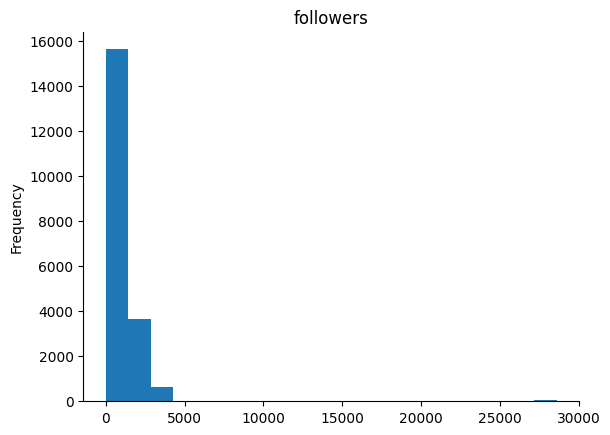

In [ ]:
from matplotlib import pyplot as plt
data['followers'].plot(kind='hist', bins=20, title='followers')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data['post_created'] = pd.to_datetime(data['post_created'])
data.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets
0,2015-08-30 07:48:37+00:00,it's just over years since i was diagnosed wi...,84,211,251,837,0
1,2015-08-30 07:31:33+00:00,"it's sunday, i need a break, so i'm planning t...",84,211,251,837,1
2,2015-08-29 22:11:07+00:00,awake but tired. i need to sleep but my brain ...,84,211,251,837,0
3,2015-08-29 18:40:49+00:00,rt @sewhq: #retro bears make perfect gifts and...,84,211,251,837,2
4,2015-08-29 18:40:26+00:00,it’s hard to say whether packing lists are mak...,84,211,251,837,1


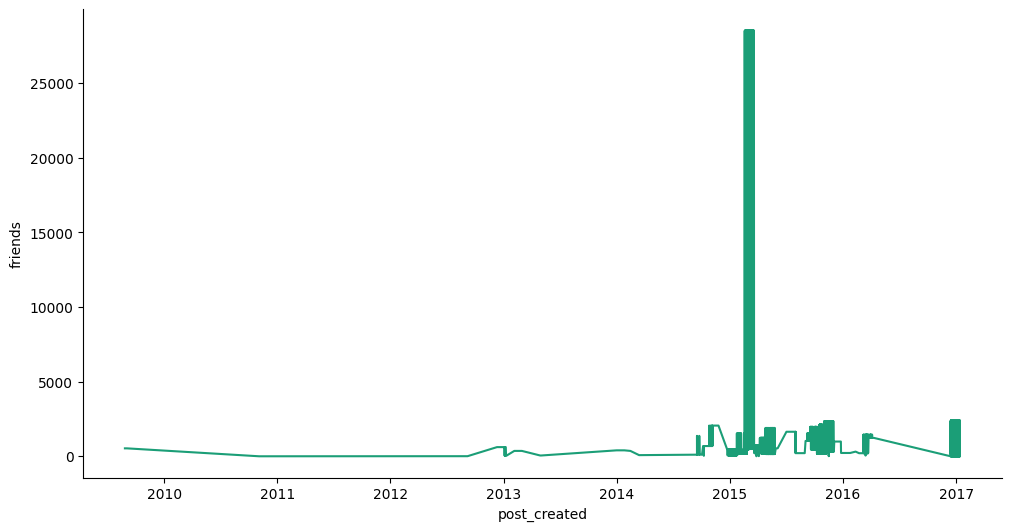

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['post_created']
  ys = series['friends']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('post_created', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('post_created')
_ = plt.ylabel('friends')

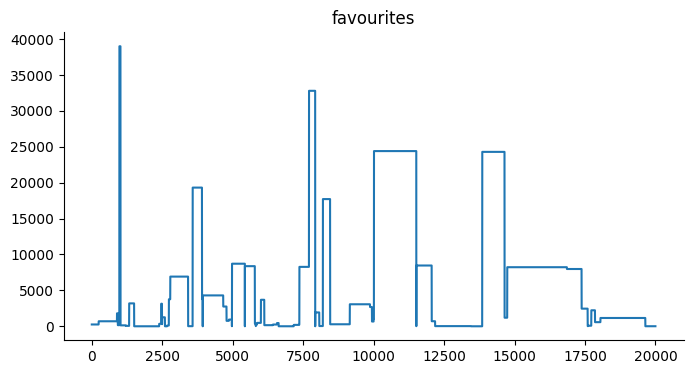

In [ ]:
from matplotlib import pyplot as plt
data['favourites'].plot(kind='line', figsize=(8, 4), title='favourites')
plt.gca().spines[['top', 'right']].set_visible(False)

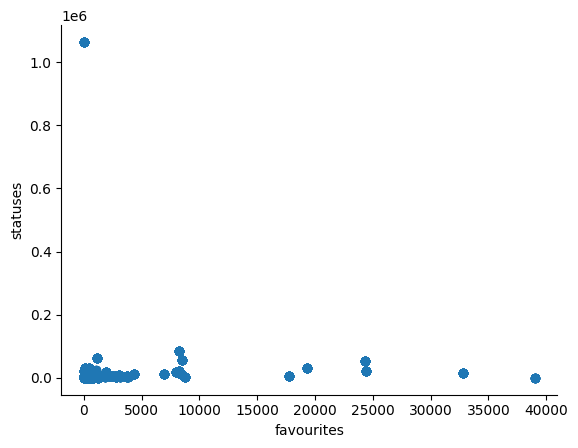

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='favourites', y='statuses', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)